In [1]:
import pandas as pd

df = pd.read_csv("Data\Combined_Datasets\Enrolment_Combined.csv")



<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\prash\AppData\Local\Temp\ipykernel_17440\2306434906.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("Data\Combined_Datasets\Enrolment_Combined.csv")


In [2]:
# basic info
print(df.shape)
print(df.head())

# unique counts
print("Unique dates:", df["date"].nunique())
print("Unique states:", df["state"].nunique())
print("Unique districts:", df["district"].nunique())
print("Unique pincodes:", df["pincode"].nunique())

# unique (state, district) pairs
print("Unique (state, district) pairs:",
      df[["state", "district"]].drop_duplicates().shape[0])


(1006029, 7)
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  
Unique dates: 92
Unique states: 55
Unique districts: 985
Unique pincodes: 19463
Unique (state, district) pairs: 1070


In [24]:
df['date'].describe

<bound method NDFrame.describe of 0          02-03-2025
1          09-03-2025
2          09-03-2025
3          09-03-2025
4          09-03-2025
              ...    
1006024    31-12-2025
1006025    31-12-2025
1006026    31-12-2025
1006027    31-12-2025
1006028    31-12-2025
Name: date, Length: 994284, dtype: object>

In [3]:
for s in sorted(df["state"].unique()):
    print(s)


100000
Andaman & Nicobar Islands
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra & Nagar Haveli
Dadra and Nagar Haveli
Dadra and Nagar Haveli and Daman and Diu
Daman & Diu
Daman and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu & Kashmir
Jammu And Kashmir
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
ODISHA
Odisha
Orissa
Pondicherry
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
The Dadra And Nagar Haveli And Daman And Diu
Tripura
Uttar Pradesh
Uttarakhand
WEST BENGAL
WESTBENGAL
West  Bengal
West Bangal
West Bengal
West bengal
Westbengal
andhra pradesh


In [4]:
df[df["state"].str.strip().str.fullmatch("Delhi", na=False)]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
24,09-03-2025,Delhi,West Delhi,110018,29,11,15
28,09-03-2025,Delhi,West Delhi,110059,93,42,42
40,15-03-2025,Delhi,West Delhi,110059,24,34,18
52,15-03-2025,Delhi,North West Delhi,110086,35,15,10
210,01-04-2025,Delhi,North West Delhi,110040,221,134,28
...,...,...,...,...,...,...,...
1003085,31-12-2025,Delhi,South Delhi,110025,25,14,1
1003086,31-12-2025,Delhi,South West Delhi,110046,7,5,0
1003087,31-12-2025,Delhi,South West Delhi,110061,0,3,0
1003088,31-12-2025,Delhi,West Delhi,110026,2,1,0


In [5]:
repeat_counts = (
    df.groupby(["state", "district", "pincode"])
      .size()
      .reset_index(name="count")
      .query("count > 1")
)

print(repeat_counts)


                           state  district  pincode  count
0                         100000    100000   100000     22
1      Andaman & Nicobar Islands  Andamans   744101      9
2      Andaman & Nicobar Islands  Andamans   744103     22
3      Andaman & Nicobar Islands  Andamans   744105     19
4      Andaman & Nicobar Islands  Andamans   744106      4
...                          ...       ...      ...    ...
28979                West Bengal     nadia   742121      3
28980                West bengal   hooghly   712401      3
28981                West bengal   hooghly   712415      4
28983                 Westbengal   Hooghly   712247      5
28984             andhra pradesh  chittoor   517520      4

[27376 rows x 4 columns]


In [6]:
df[
    (df["state"] == "Andaman & Nicobar Islands") &
    (df["district"] == "Andamans") &
    (df["pincode"] == 744101)
][["date"]].sort_values("date").drop_duplicates().shape


(9, 1)

In [9]:
pair_df = df[
    (df["state"] == "Andaman & Nicobar Islands") &
    (df["district"] == "Andamans") &
    (df["pincode"] == 744101)
].copy()


In [10]:
pair_df["date"] = pd.to_datetime(pair_df["date"], dayfirst=True)
pair_df = pair_df.sort_values("date")


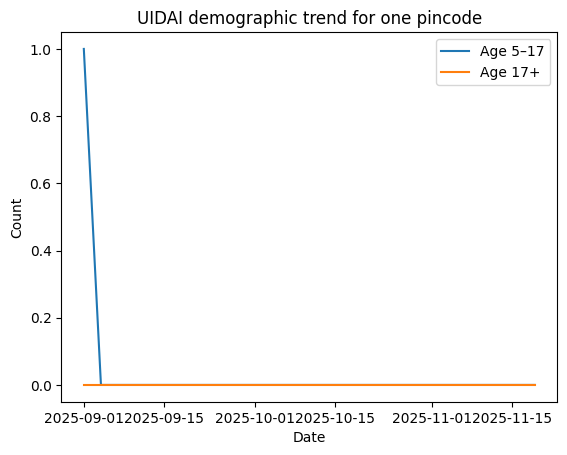

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pair_df["date"], pair_df["age_5_17"], label="Age 5–17")
plt.plot(pair_df["date"], pair_df["age_18_greater"], label="Age 17+")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("UIDAI demographic trend for one pincode")
plt.legend()
plt.show()


In [12]:
test_cases = [
    ("Delhi", "Central Delhi"),
    ("Delhi", "South Delhi"),
    ("Maharashtra", "Mumbai"),
    ("Karnataka", "Bengaluru Urban"),
    ("Tamil Nadu", "Chennai")
]


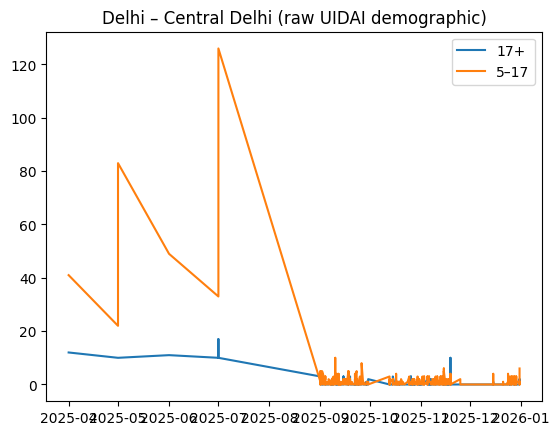

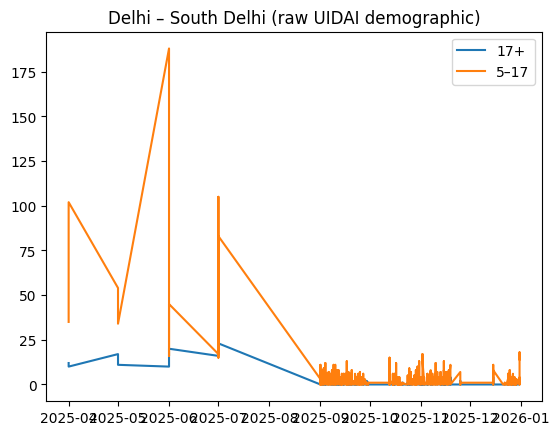

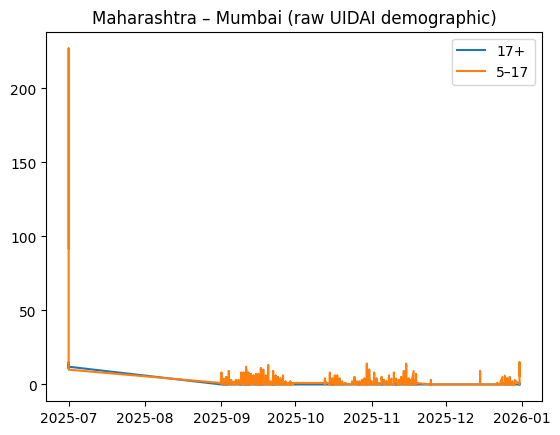

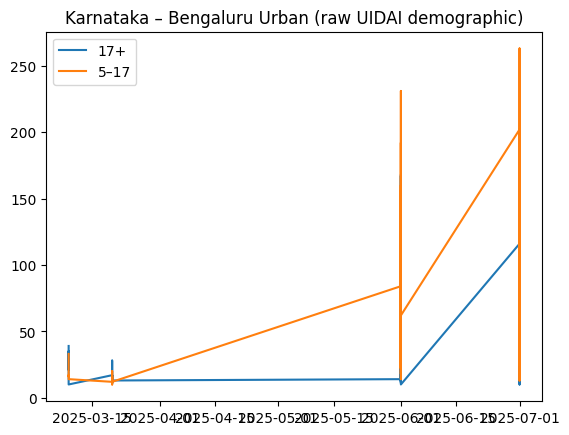

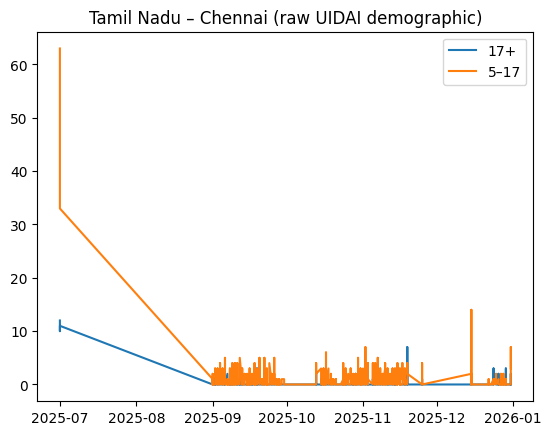

In [14]:


for state, district in test_cases:
    sub = df[
        (df["state"] == state) &
        (df["district"] == district)
    ].copy()

    if sub.empty:
        print(f"Skipping {state} – {district} (not found)")
        continue

    sub["date"] = pd.to_datetime(sub["date"], dayfirst=True)
    sub = sub.sort_values("date")

    plt.figure()
    plt.plot(sub["date"], sub["age_18_greater"], label="17+")
    plt.plot(sub["date"], sub["age_5_17"], label="5–17")
    plt.title(f"{state} – {district} (raw UIDAI demographic)")
    plt.legend()
    plt.show()

In [4]:
dup_geo = df.duplicated(subset=["state", "district"], keep=False)
df[dup_geo].sort_values(["state", "district", "date"])


,date,state,district,pincode,demo_age_5_17,demo_age_17_
2007370,20-12-2025,100000,100000,100000,0,1
795161,23-12-2025,100000,100000,100000,0,1
6660,01-09-2025,Andaman & Nicobar Islands,Andamans,744103,0,1
420893,01-09-2025,Andaman & Nicobar Islands,Andamans,744105,0,1
420894,01-09-2025,Andaman & Nicobar Islands,Andamans,744106,0,2
...,...,...,...,...,...,...
2002211,15-12-2025,west Bengal,South 24 Parganas,743368,0,1
1313094,16-09-2025,west Bengal,South 24 Parganas,743368,0,1
582910,16-11-2025,west Bengal,South 24 Parganas,743368,0,1
1907878,16-11-2025,west Bengal,South 24 Parganas,743368,0,1


In [5]:
repeat_across_dates = (
    df.groupby(["state", "district"])
      .agg(unique_dates=("date", "nunique"),
           rows=("date", "count"))
      .reset_index()
)

repeat_across_dates[repeat_across_dates["unique_dates"] > 1]


,state,district,unique_dates,rows
0,100000,100000,2,2
1,Andaman & Nicobar Islands,Andamans,80,314
2,Andaman & Nicobar Islands,Nicobars,3,4
3,Andaman & Nicobar Islands,South Andaman,73,195
4,Andaman and Nicobar Islands,Nicobar,59,128
...,...,...,...,...
1073,Westbengal,Howrah,5,7
1074,andhra pradesh,chittoor,24,37
1075,andhra pradesh,rangareddi,13,16
1076,odisha,Gajapati,12,17


In [3]:
import pandas as pd

# --- normalize text ---
df["state_clean"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r"\s+", " ", regex=True)
)

# --- canonical mapping ---
STATE_MAP = {
    "andaman & nicobar islands": "Andaman and Nicobar Islands",
    "andhra pradesh": "Andhra Pradesh",
    "chhatisgarh": "Chhattisgarh",
    "dadra & nagar haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "dadra and nagar haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "daman & diu": "Dadra and Nagar Haveli and Daman and Diu",
    "daman and diu": "Dadra and Nagar Haveli and Daman and Diu",
    "jammu & kashmir": "Jammu and Kashmir",
    "orissa": "Odisha",
    "pondicherry": "Puducherry",
    "uttaranchal": "Uttarakhand",
    "westbengal": "West Bengal",
    "west bengli": "West Bengal",
    "west bangal": "West Bengal",
    "west  bengal": "West Bengal",
}

# --- apply mapping; fall back to title case ---
df["state_std"] = df["state_clean"].map(STATE_MAP).fillna(df["state_clean"].str.title())

# --- drop numeric garbage ---
df = df[~df["state_std"].str.fullmatch(r"\d+", na=False)]

# --- allow-list of valid States + UTs ---
VALID_STATES_UTS = {
    "Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh",
    "Goa","Gujarat","Haryana","Himachal Pradesh","Jharkhand","Karnataka",
    "Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram",
    "Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu",
    "Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal",
    "Delhi","Jammu and Kashmir","Ladakh",
    "Andaman and Nicobar Islands","Chandigarh",
    "Dadra and Nagar Haveli and Daman and Diu",
    "Lakshadweep","Puducherry"
}

df = df[df["state_std"].isin(VALID_STATES_UTS)]

# --- result ---
print(df["state_std"].nunique())      # should be 36
print(sorted(df["state_std"].unique()))


36
['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [16]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean,state_std
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,meghalaya,Meghalaya
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,karnataka,Karnataka
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,uttar pradesh,Uttar Pradesh
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,uttar pradesh,Uttar Pradesh
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0,west bengal,West Bengal
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0,west bengal,West Bengal
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0,west bengal,West Bengal
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0,west bengal,West Bengal


In [4]:
age_17_by_state = df.groupby("state_std")["age_18_greater"].sum().reset_index()

# optionally, rename column
age_17_by_state.rename(columns={"age_18_greater": "total_age_18_greater"}, inplace=True)

# show result
print(age_17_by_state)

                                   state_std  total_age_18_greater
0                Andaman and Nicobar Islands                     0
1                             Andhra Pradesh                  1495
2                          Arunachal Pradesh                   151
3                                      Assam                 22877
4                                      Bihar                 11908
5                                 Chandigarh                    36
6                               Chhattisgarh                  1997
7   Dadra and Nagar Haveli and Daman and Diu                     4
8                                      Delhi                  3050
9                                        Goa                   163
10                                   Gujarat                 16336
11                                   Haryana                  1100
12                          Himachal Pradesh                   186
13                         Jammu and Kashmir                  

In [5]:
age_5_17_by_state = df.groupby("state_std")["age_5_17"].sum().reset_index()

# optionally, rename column
age_5_17_by_state.rename(columns={"age_5_17": "total_age_5_17"}, inplace=True)

# show result
print(age_5_17_by_state)

                                   state_std  total_age_5_17
0                Andaman and Nicobar Islands               5
1                             Andhra Pradesh           13746
2                          Arunachal Pradesh            2236
3                                      Assam           66085
4                                      Bihar          334802
5                                 Chandigarh             211
6                               Chhattisgarh           18769
7   Dadra and Nagar Haveli and Daman and Diu              88
8                                      Delhi           22296
9                                        Goa             254
10                                   Gujarat           71182
11                                   Haryana            9110
12                          Himachal Pradesh             661
13                         Jammu and Kashmir              22
14                                 Jharkhand           57539
15                      

In [6]:
india_total = pd.DataFrame({
    "state_std": ["India"],
    "total_age_5_17": [age_5_17_by_state["total_age_5_17"].sum()]
})

india_total2 = pd.DataFrame({
    "state_std": ["India"],
    "total_age_18_greater": [age_17_by_state["total_age_18_greater"].sum()]
})

# --- append India row to the state-level df (optional) ---
age_5_17_by_state = pd.concat([age_5_17_by_state, india_total], ignore_index=True)
age_17_by_state = pd.concat([age_17_by_state, india_total2], ignore_index=True)
merged_df = pd.merge(age_17_by_state, age_5_17_by_state, on='state_std')

# --- save to CSV ---
merged_df.to_csv("age_enrollment_by_state_.csv", index=False)

# --- check ---
print(merged_df)

                                   state_std  total_age_18_greater  \
0                Andaman and Nicobar Islands                     0   
1                             Andhra Pradesh                  1495   
2                          Arunachal Pradesh                   151   
3                                      Assam                 22877   
4                                      Bihar                 11908   
5                                 Chandigarh                    36   
6                               Chhattisgarh                  1997   
7   Dadra and Nagar Haveli and Daman and Diu                     4   
8                                      Delhi                  3050   
9                                        Goa                   163   
10                                   Gujarat                 16336   
11                                   Haryana                  1100   
12                          Himachal Pradesh                   186   
13                  

All Regions in dataset:
['INDIA' 'Jammu & Kashmir' 'Himachal Pradesh' 'Punjab' 'Chandigarh'
 'Uttarakhand' 'Haryana' 'NCT OF Delhi' 'Rajasthan' 'Uttar Pradesh'
 'Bihar' 'Sikkim' 'Arunachal Pradesh *' 'Nagaland   ^' 'Manipur' 'Mizoram'
 'Tripura' 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha'
 'Chhattisgarh' 'Madhya Pradesh   $$' 'Gujarat' 'Daman & Diu '
 'Dadra & Nagar Haveli' 'Maharashtra  ##' 'Andhra Pradesh @@' 'Karnataka'
 'Goa' 'Lakshadweep' 'Kerala' 'Tamil Nadu' 'Puducherry'
 'Andaman & Nicobar Islands']


In [ ]:
df["state_clean"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r"[^a-z\s]", "", regex=True)  # remove symbols like *, ^, @, #, $, &
    .str.replace(r"\s+", " ", regex=True)      # normalize spaces
)

In [10]:
print(df["state_std"].nunique())      # should be 36
print(sorted(df["state_std"].unique()))

0
[]
